In [39]:
#imports libraries
import pandas as pd, matplotlib.pyplot as plt

#display plots inline
%matplotlib inline

In [40]:
#loads data into pandas data frame
drc_data = pd.read_excel('DRC_data.xlsx')

In [58]:
#information on actors, location and fatalities for each event
year_data = drc_data[['LOCATION', 'FATALITIES', 'ACTOR1']]

year_data.index = drc_data['EVENT_DATE']

In [67]:
#data for each actor
actor_data = year_data.groupby(by = 'ACTOR1')['FATALITIES'].sum()

#order by fatalities per group
actor_data = actor_data.order(ascending = False)

#prints five most violent groups 
print(actor_data.head(5))


ACTOR1
ADFL: Alliance of Democratic Forces for Liberation         26456
LRA: Lord's Resistance Army                                 4389
Military Forces of Democratic Republic of Congo (2001-)     4342
Lendu Ethnic Militia (Democratic Republic of Congo)         3504
RCD-Goma: Rally for Congolese Democracy (Goma)              3184
Name: FATALITIES, dtype: int64
Index(['ADFL: Alliance of Democratic Forces for Liberation',
       'LRA: Lord's Resistance Army',
       'Military Forces of Democratic Republic of Congo (2001-)',
       'Lendu Ethnic Militia (Democratic Republic of Congo)',
       'RCD-Goma: Rally for Congolese Democracy (Goma)',
       'FDLR: Democratic Forces for the Liberation of Rwanda',
       'RCD: Rally for Congolese Democracy',
       'Military Forces of Democratic Republic of Congo (1997-2001)',
       'Civilians (Democratic Republic of Congo)',
       'Military Forces of Rwanda (1994-)', 
       ...
       'Militia (General Rubaruba)', 'Militia (Faustin Munene)',
   

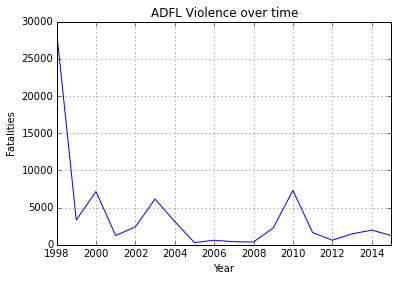

In [63]:
#plots ADFL fatalities over time
year_data.index = pd.to_datetime(year_data.index)

#resamples for each year
resampled_data = year_data.resample('A', how = "sum")

#plots the data
plt.plot(resampled_data.index, resampled_data['FATALITIES'])

#add axis labels
plt.ylabel('Fatalities')
plt.xlabel('Year')

#title
plt.title('ADFL Violence over time')

#gridlines
plt.grid(True)

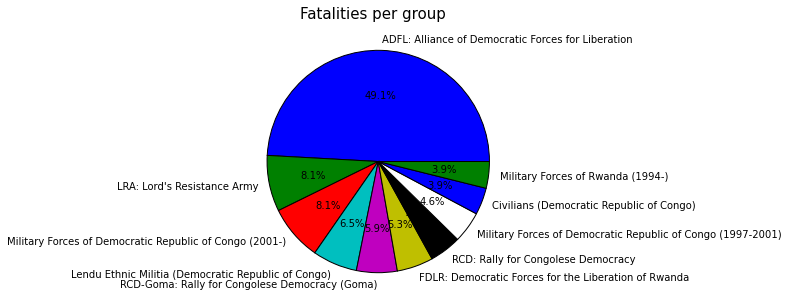

In [76]:
#pie chart to show percent of total fatalities for each group
plt.pie(actor_data[:10], labels = actor_data[:10].index, autopct='%1.1f%%')
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

#title
plt.suptitle('Fatalities per group', fontsize = 15, y = 1.05)
plt.show()